# Exercise 4
## Problem 1

In [88]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [89]:
# Import House Data Set
houseData = pd.read_csv('../data files/train.csv')
# houseData.info()

In [90]:
GrLivArea = pd.DataFrame(houseData['GrLivArea'])
SalePrice = pd.DataFrame(houseData['SalePrice'])

In [91]:
jointDF = pd.concat([GrLivArea, SalePrice], axis = 1).reindex(GrLivArea.index)
jointDF.describe()

,GrLivArea,SalePrice
count,1460.000000,1460.000000
mean,1515.463699,180921.195890
std,525.480383,79442.502883
min,334.000000,34900.000000
25%,1129.500000,129975.000000
50%,1464.000000,163000.000000
75%,1776.750000,214000.000000
max,5642.000000,755000.000000


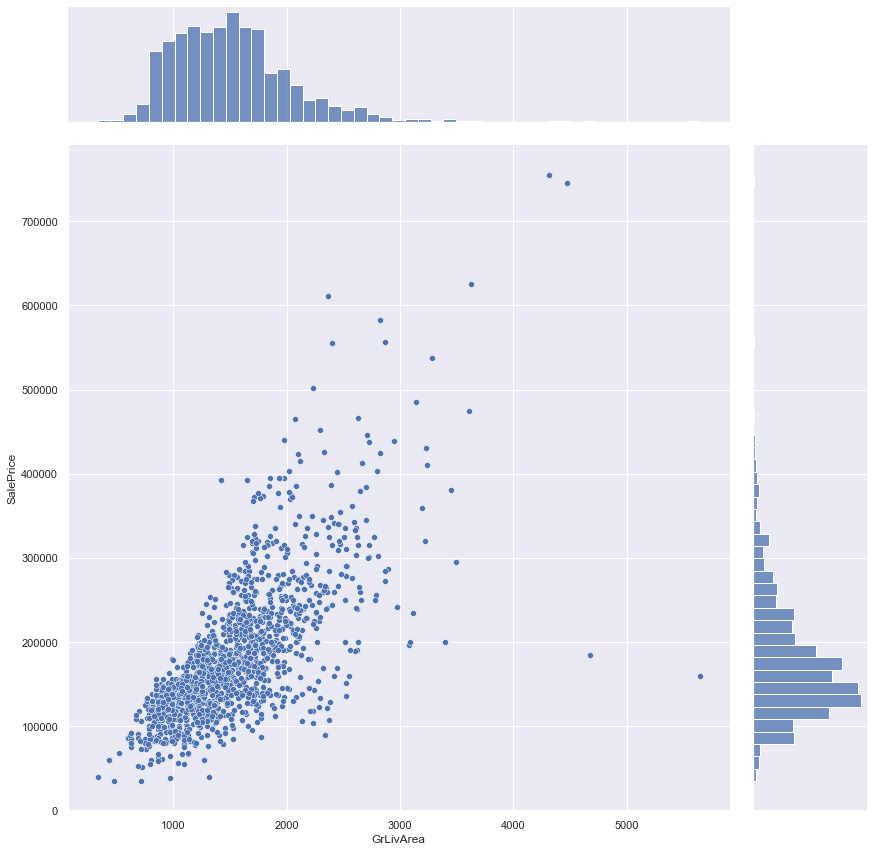

In [92]:
# Draw jointplot of the two variables in the joined dataframe
sb.jointplot(data = jointDF, x = "GrLivArea", y = "SalePrice", height = 12)

#### The Joint Plot of SalePrice vs GrLivArea shows a strong linear relationship

In [93]:
# Print the correlation coefficient between these two variables to get a numerical evidence of the relationship
jointDF.corr()

,GrLivArea,SalePrice
GrLivArea,1.000000,0.708624
SalePrice,0.708624,1.000000


<AxesSubplot:>

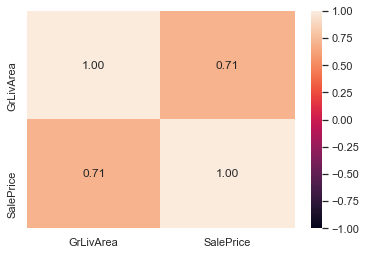

In [94]:
sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

In [95]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression
# Additional libraries for Splitting the Train and Test sets randomly
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Create a Linear Regression object for SalePrice against GrLivArea
SP_GLA = LinearRegression()

In [96]:
# Partition the dataset houseData into two “random” portions : Train Data (1100 rows) and Test Data (360 rows).
GrLivArea_train, GrLivArea_test, SalePrice_train, SalePrice_test = train_test_split(GrLivArea, SalePrice, test_size = None, train_size = 1100)

# Check the sample sizes
print("Train Set :", GrLivArea_train.shape, SalePrice_train.shape)
print("Test Set  :", GrLivArea_test.shape, SalePrice_test.shape)

Train Set : (1100, 1) (1100, 1)
Test Set  : (360, 1) (360, 1)


In [97]:
# F# Train the Linear Regression modelit a Linear Regression model on the Train Dataset to predict or estimate SalePrice using GrLivArea
SP_GLA.fit(GrLivArea_train, SalePrice_train)

LinearRegression()

In [98]:
# Coefficients of the Linear Regression line
print('Intercept \t: b = ', SP_GLA.intercept_)
print('Coefficients \t: a = ', SP_GLA.coef_)

Intercept 	: b =  [26800.98323567]
Coefficients 	: a =  [[101.3666552]]


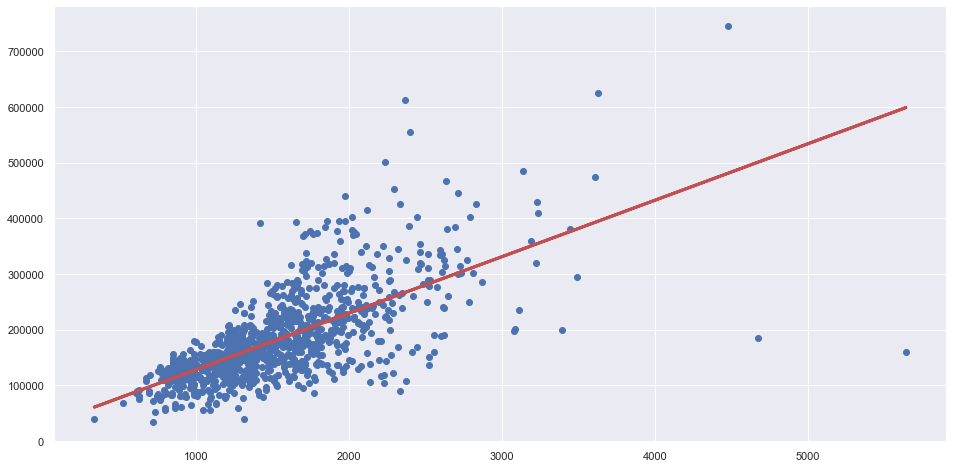

In [99]:
# Plot the regression line on a scatterplot
# Formula for the Regression line
regline_x = GrLivArea_train
regline_y = SP_GLA.intercept_ + SP_GLA.coef_ * GrLivArea_train

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(GrLivArea_train, SalePrice_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

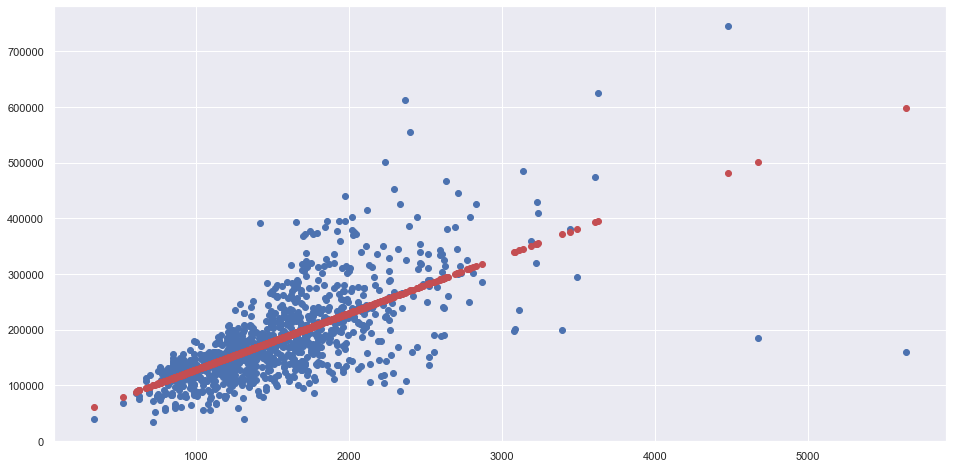

In [100]:
# Predict Total values corresponding to HP Train
SalePrice_train_pred = SP_GLA.predict(GrLivArea_train)

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(GrLivArea_train, SalePrice_train)
plt.scatter(GrLivArea_train, SalePrice_train_pred, color = "r")
plt.show()

In [101]:
# Print Explained Variance (R^2) and Mean Squared Error (MSE) on Train Data to check Goodness of Fit of model
print("Explained Variance (R^2) \t:", SP_GLA.score(GrLivArea_train, SalePrice_train))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(SalePrice_train, SalePrice_train_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Explained Variance (R^2) 	: 0.4642952205641465
Mean Squared Error (MSE) 	: 3248302463.0234704
Root Mean Squared Error (RMSE) 	: 56993.88092614391


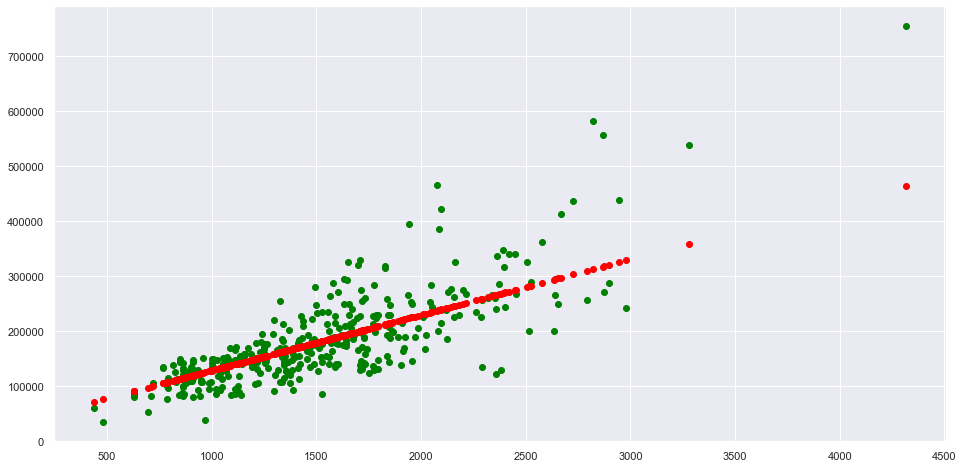

In [102]:
# Predict SalePrice in case of Test Data using the Linear Regression model and the predictor variable GrLivArea
# Predict Total values corresponding to GrLivArea Test
SalePrice_test_pred = SP_GLA.predict(GrLivArea_test)

# Plot the predictions on a Scatterplot of GrLivArea and SalePrice in the Test Data to visualize model accuracy
# Plot the Predictions
f = plt.figure(figsize=(16, 8))
plt.scatter(GrLivArea_test, SalePrice_test, color = "green")
plt.scatter(GrLivArea_test, SalePrice_test_pred, color = "red")
plt.show()

In [103]:
# Print the Mean Squared Error (MSE) on Test Data to check Goodness of Fit of model, compared to the Training
# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", SP_GLA.score(GrLivArea_test, SalePrice_test))
# it is possible to obtain negative R^2 as it is not a squared value (negative means the regression line model the data worst)

mse = mean_sq_err(SalePrice_test, SalePrice_test_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Explained Variance (R^2) 	: 0.5962012512625947
Mean Squared Error (MSE) 	: 2846641463.992057
Root Mean Squared Error (RMSE) 	: 53353.926415888614


## Problem 2
#### Predicting SalePrice using Other Variables
Perform all the above steps on “SalePrice” against each of the variables “LotArea”, “TotalBsmtSF”, “GarageArea” oneby-one to perform individual Linear Regressions and obtain individual univariate Linear Regression Models in each case.

For SalePrice against LotArea

Intercept of Regression 	: b =  [159231.10598782]
Coefficients of Regression 	: a =  [[1.94293455]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.07131435113310969
Mean Squared Error (MSE) 	: 5594035180.24396
Root Mean Squared Error (RMSE) 	: 74793.28298880829

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.0610116244338641
Mean Squared Error (MSE) 	: 6720470191.96036
Root Mean Squared Error (RMSE) 	: 74793.28298880829



For SalePrice against TotalBsmtSF

Intercept of Regression 	: b =  [70364.98025698]
Coefficients of Regression 	: a =  [[104.03998588]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.3447357987809856
Mean Squared Error (MSE) 	: 3879164956.6036496
Root Mean Squared Error (RMSE) 	: 62282.9427420032

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.4473920756504397
Mean Squared Error (MSE) 	: 4135242971.353677
Root Mean Squared Error (RMSE) 	: 62282.9

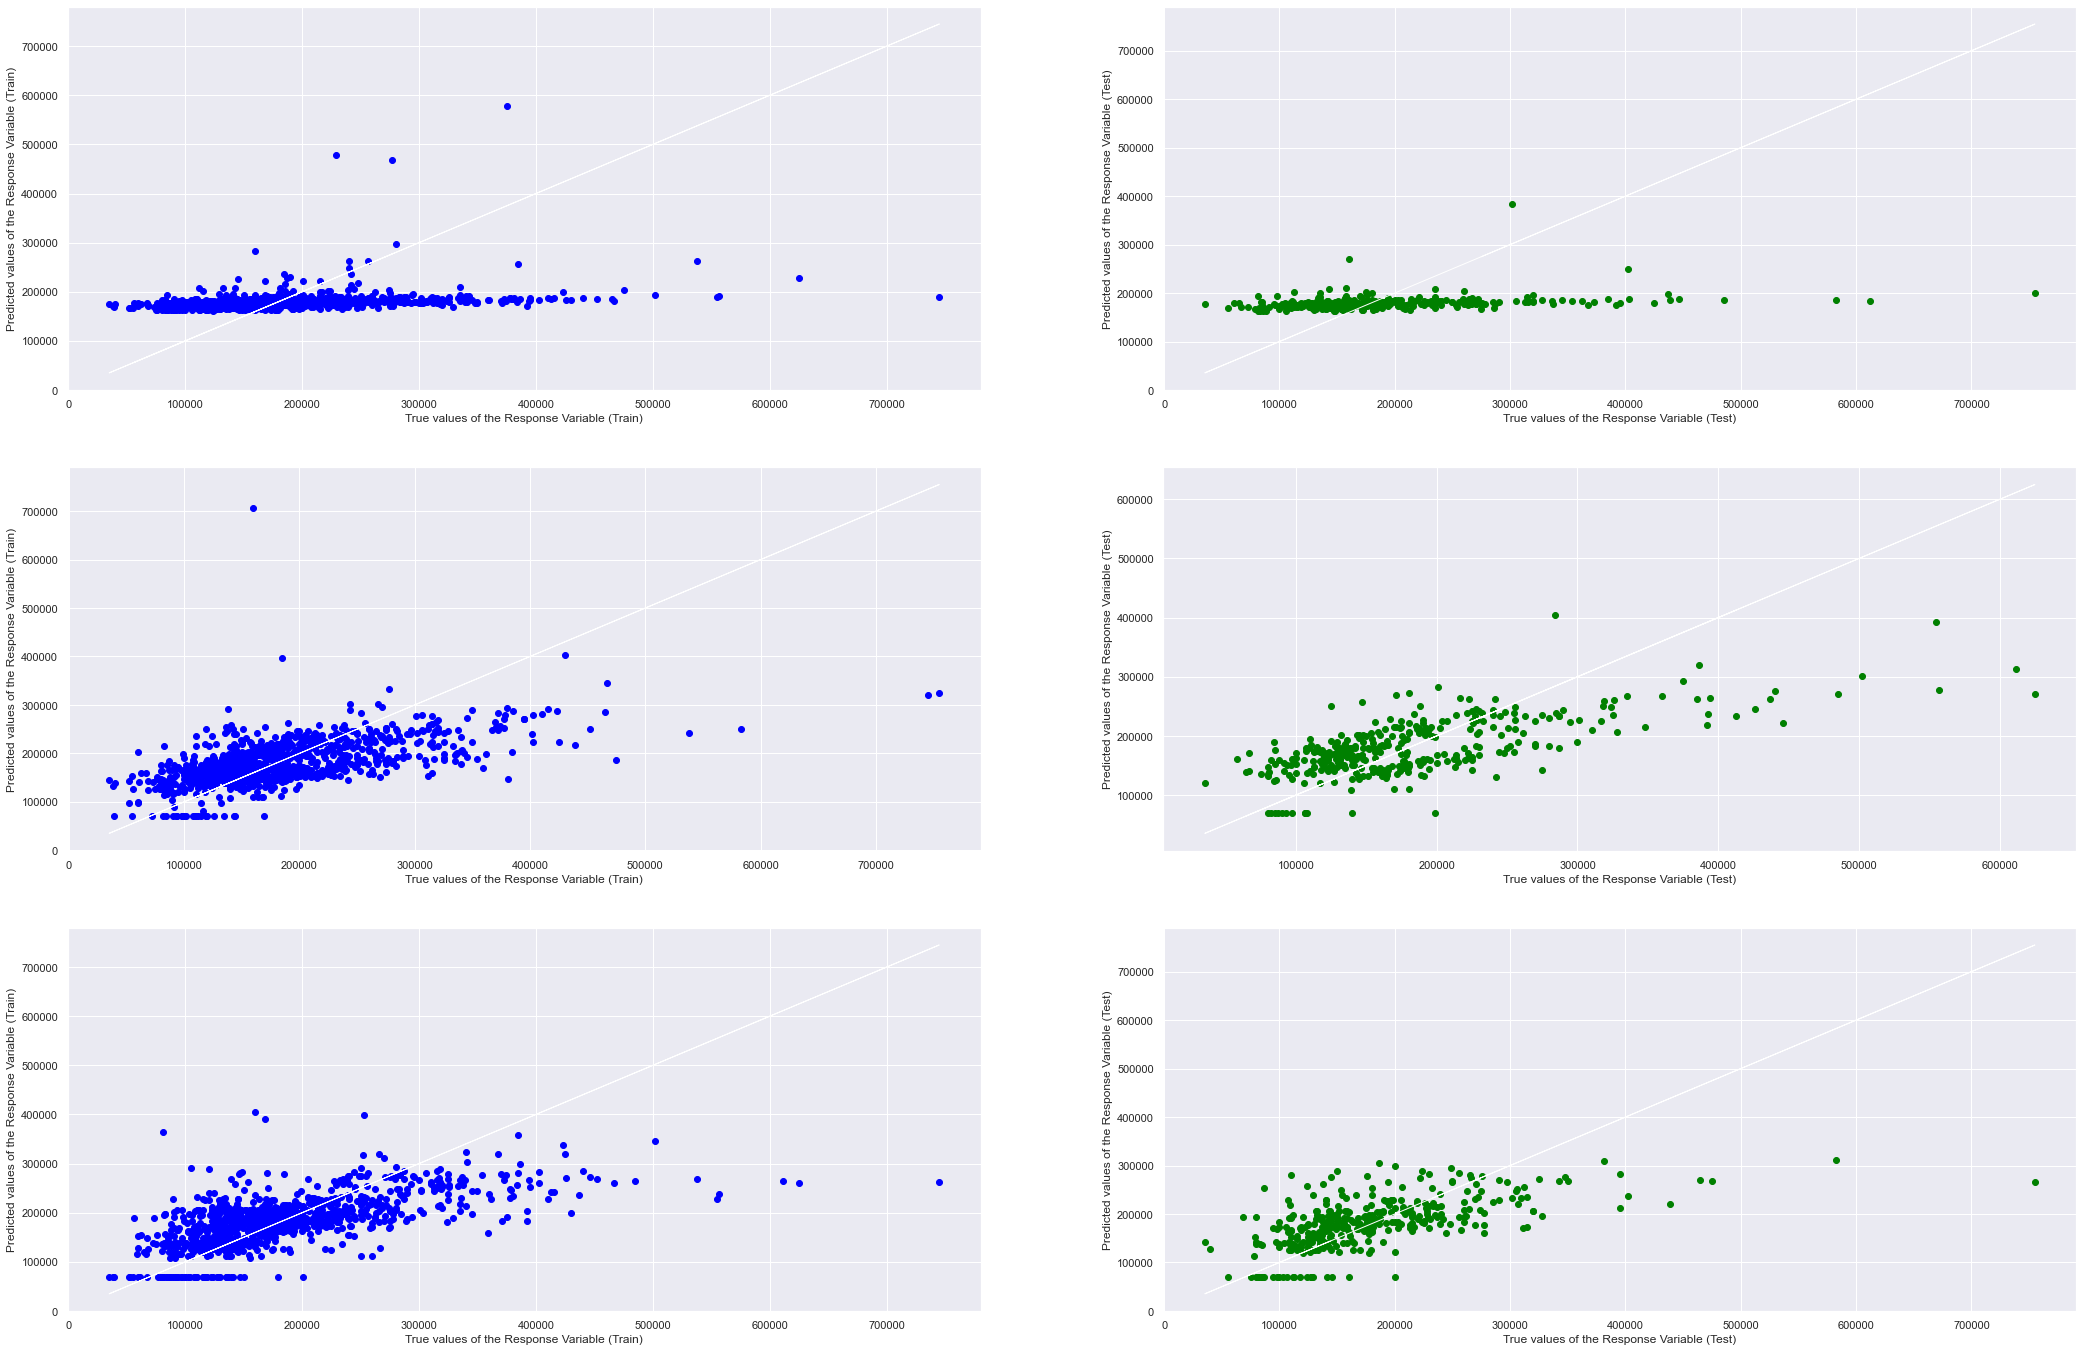

In [104]:
LotArea = pd.DataFrame(houseData['LotArea'])
TotalBsmtSF = pd.DataFrame(houseData['TotalBsmtSF'])
GarageArea = pd.DataFrame(houseData['GarageArea'])

# creating lists
data, list, X_train, X_test, Y_train, Y_test, Y_train_pred, Y_test_pred, regline_X, regline_Y = ([] for i in range(10))

# Storing dataframes into a list 
data.append(LotArea)
data.append(TotalBsmtSF)
data.append(GarageArea)

# Split the Dataset into Train and Test
for i in range(3):
    x_train, x_test, y_train, y_test = train_test_split(data[i], SalePrice, test_size = None, train_size = 1100)
    X_train.append(x_train)
    X_test.append(x_test)
    Y_train.append(y_train)
    Y_test.append(y_test)

# appending instances to list  
list.append( LinearRegression() ) # list[0] as SalePrice against LotArea
list.append( LinearRegression() ) # list[1] as SalePrice against TotalBsmtSF
list.append( LinearRegression() ) # list[2] as SalePrice against GarageArea

# Linear Regression using Train Data
for i in range(3):
    list[i].fit(X_train[i],Y_train[i])

# Predict SalePrice values corresponding to X Values
for i in range(3):
    y_train_pred = list[i].predict(X_train[i])
    y_test_pred = list[i].predict(X_test[i])
    Y_train_pred.append(y_train_pred)
    Y_test_pred.append(y_test_pred)
    regline_x = X_train[i]
    regline_X.append(regline_x)
    regline_y = list[i].intercept_ + list[i].coef_ * X_train[i]
    regline_Y.append(regline_y)

# Constructing switch case printing for python
def listname(i):
    switcher={
            0:'For SalePrice against LotArea',
            1:'For SalePrice against TotalBsmtSF',
            2:'For SalePrice against GarageArea'
            }
    return switcher.get(i,"Invalid")

# For printing out all the informations
for i in range(3):
    # Print List name
    print(listname(i))
    print()
    # Coefficients of the Linear Regression line
    print('Intercept of Regression \t: b = ', list[i].intercept_)
    print('Coefficients of Regression \t: a = ', list[i].coef_)
    print()
    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Explained Variance (R^2) \t:", list[i].score(X_train[i], Y_train[i]))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train[i], Y_train_pred[i]))
    print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(Y_train[i], Y_train_pred[i])))
    print()
    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Explained Variance (R^2) \t:", list[i].score(X_test[i], Y_test[i]))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test[i], Y_test_pred[i]))
    print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(Y_train[i], Y_train_pred[i])))
    print()
    print()
    print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(3, 2, figsize=(36, 24))

for i in range(3):
    axes[i,0].scatter(Y_train[i], Y_train_pred[i], color = "blue")
    axes[i,0].plot(Y_train[i], Y_train[i], 'w-', linewidth = 1)
    axes[i,0].set_xlabel("True values of the Response Variable (Train)")
    axes[i,0].set_ylabel("Predicted values of the Response Variable (Train)")
    axes[i,1].scatter(Y_test[i], Y_test_pred[i], color = "green")
    axes[i,1].plot(Y_test[i], Y_test[i], 'w-', linewidth = 1)
    axes[i,1].set_xlabel("True values of the Response Variable (Test)")
    axes[i,1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

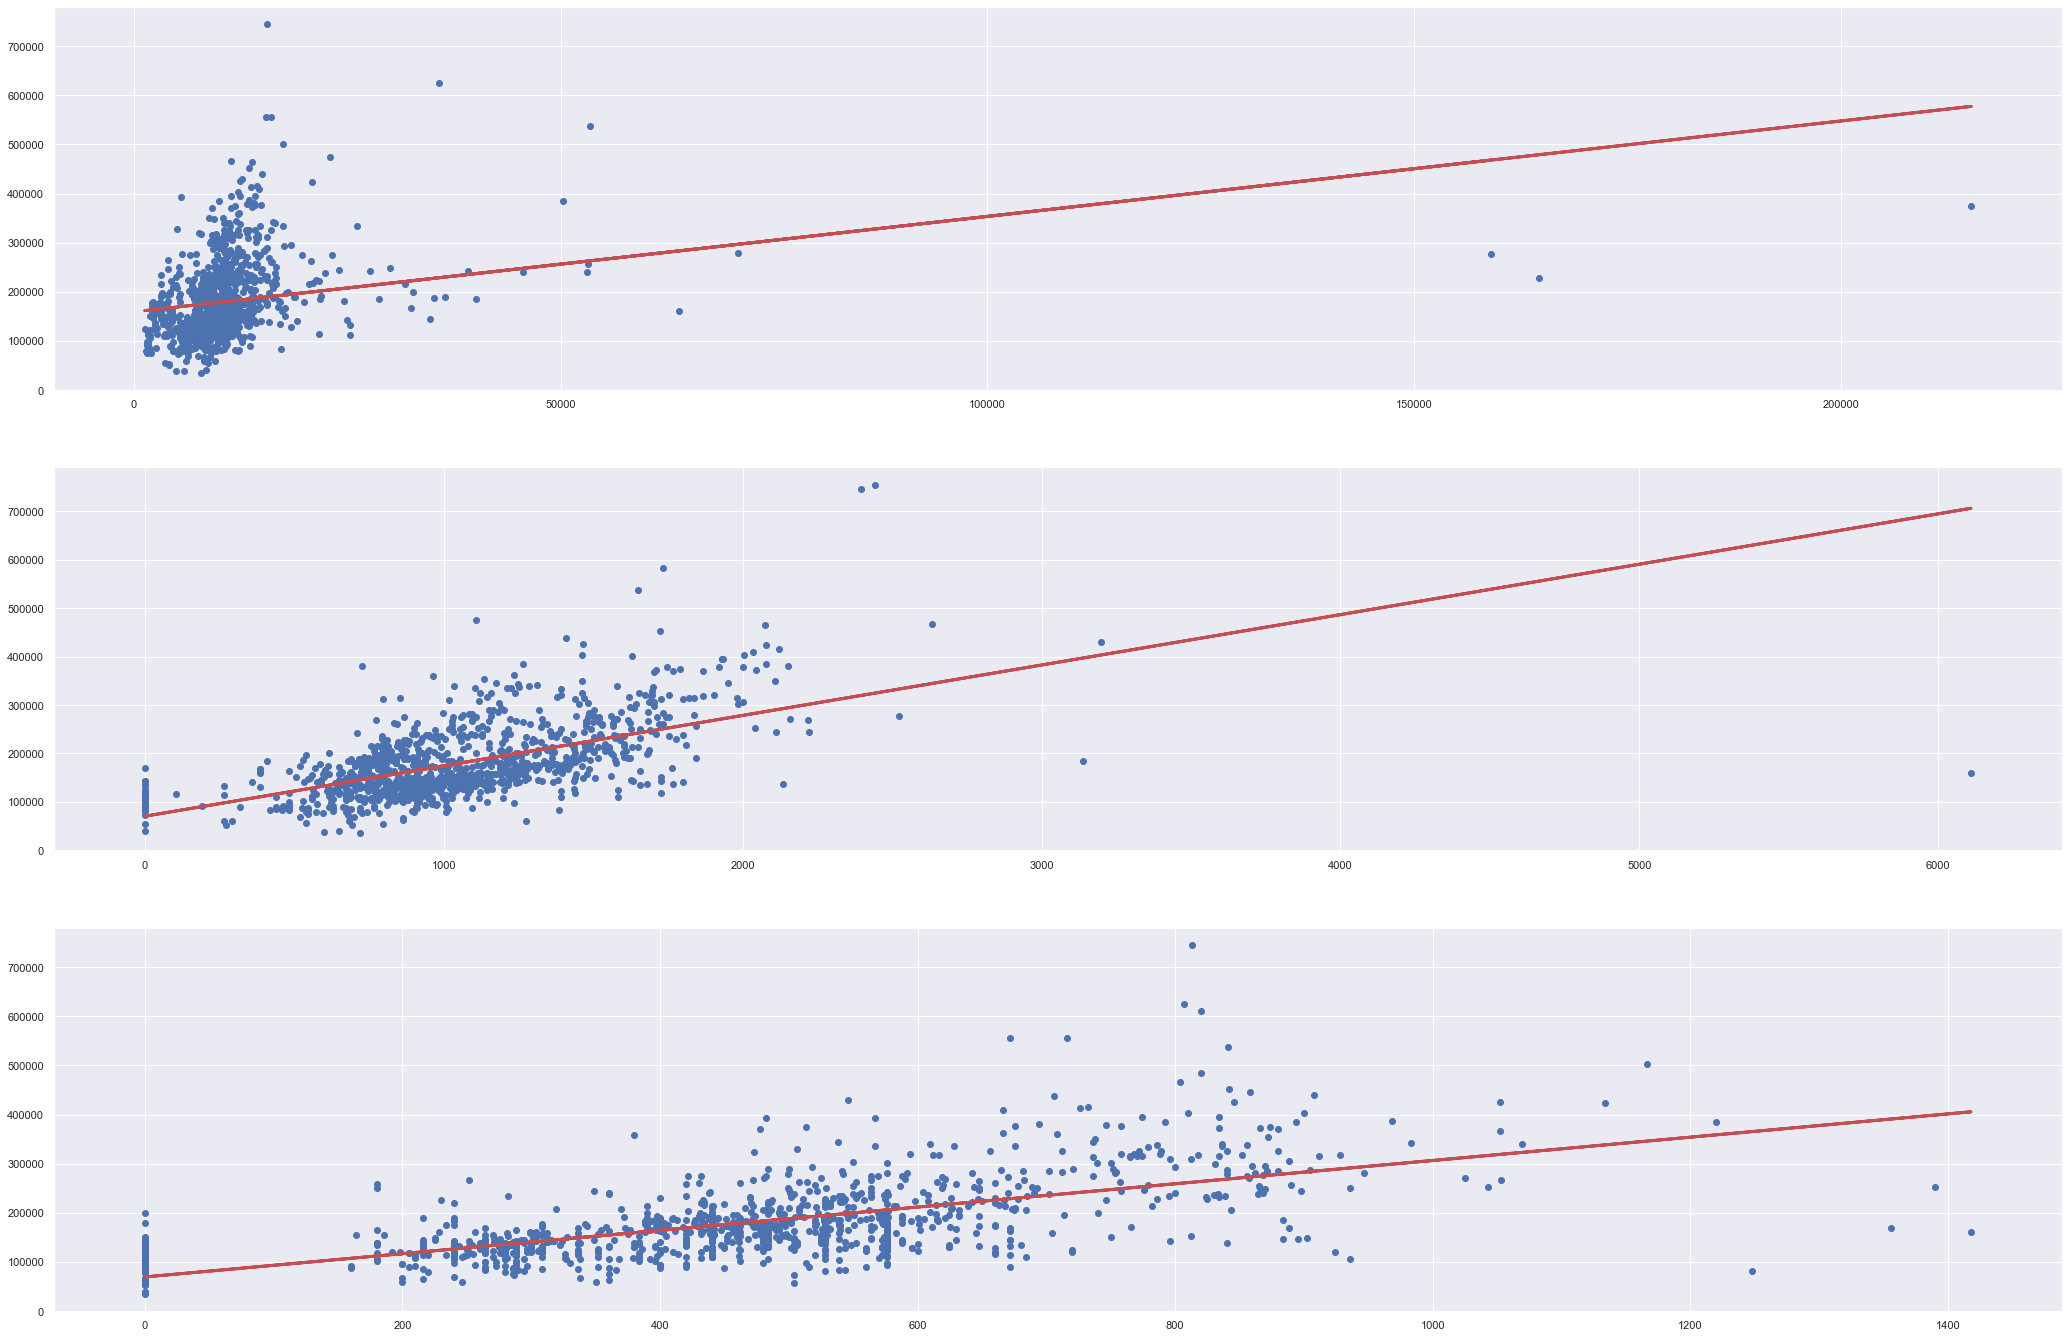

In [105]:
# Plot the Linear Regression line
f, axes = plt.subplots(3, 1, figsize=(36, 24))
for i in range(3):
    axes[i].scatter(X_train[i], Y_train[i])
    axes[i].plot(regline_X[i], regline_Y[i], 'r-', linewidth = 3)
plt.show()

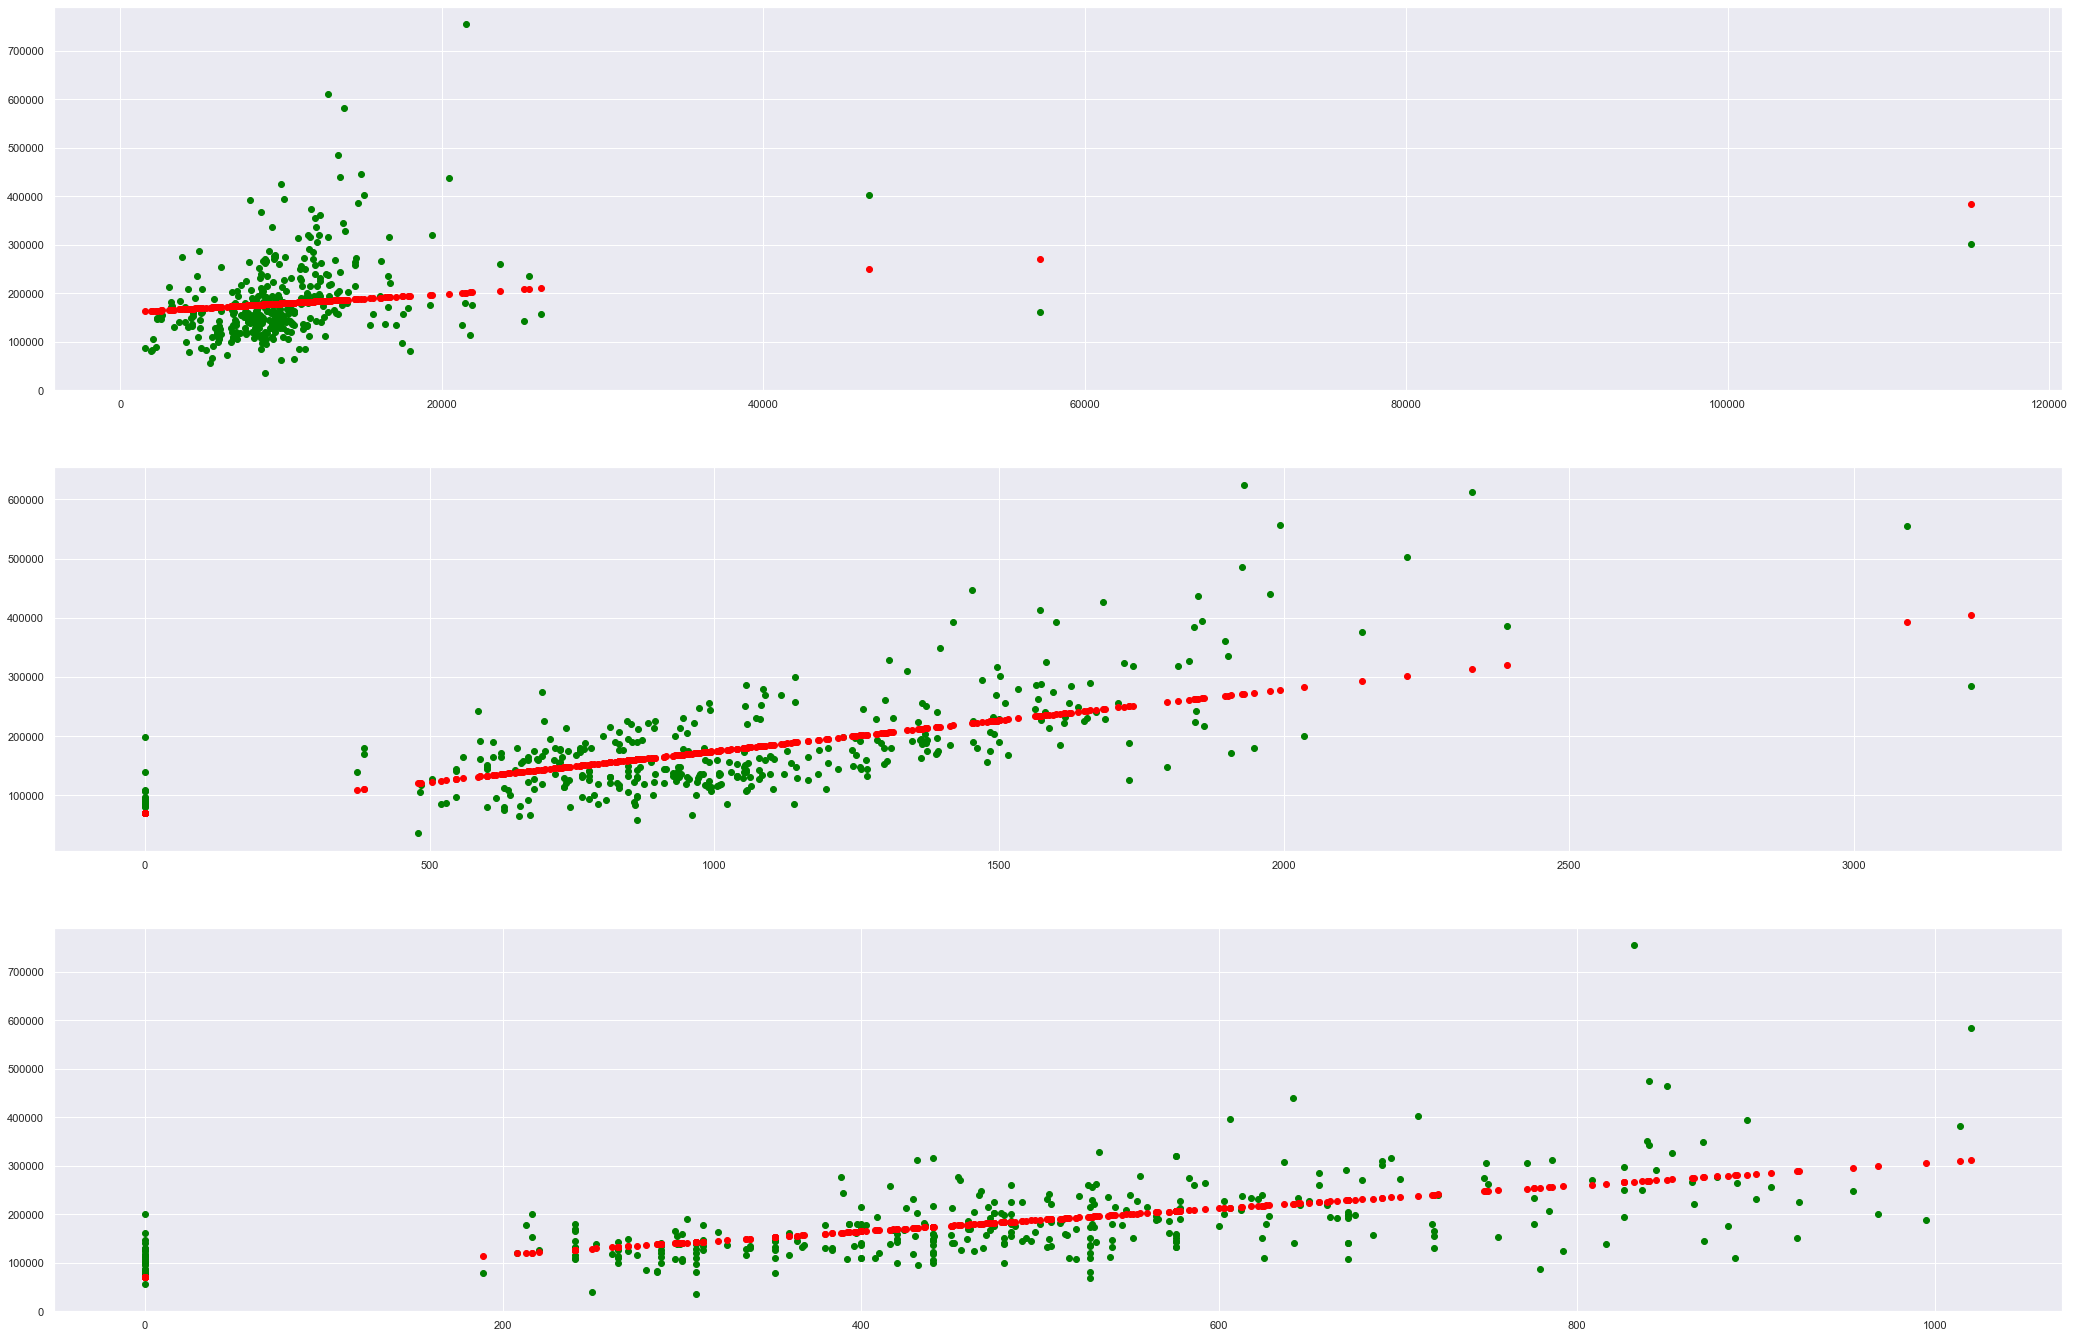

In [106]:
# Plot the predictions on a Scatterplot in the Test Data to visualize model accuracy
f, axes = plt.subplots(3, 1, figsize=(36, 24))
for i in range(3):
    axes[i].scatter(X_test[i], Y_test[i], color = "green")
    axes[i].scatter(X_test[i], Y_test_pred[i], color = "red")
plt.show()

## Problem 3
#### Compare and contrast the four models in terms of Explained Variance (R^2) and Mean Squared Error (MSE) on Train Data, the accuracy of prediction on Test Data, and comment on which model you think is the best to predict “SalePrice”.

##### For GrLivArea:
- It has higher Explained Variance (R^2) of range 0.5-0.6 than the other two models of TotalBsmtSF and GarageArea with a Explained Variance (R^2) range of 0.4-0.5
- Occasionally when running the script a couple of times, the model is able to achieve the lowest Root Mean Square Error (RMSE) of 50,000+ using test set

##### For LotArea:
- Althought it has the lowest Explained Variance (R^2) among the four models, it has one of the highest Root Mean Square Error (RMSE)
- the graph of predicted value vs actual value least resemble a y=x graph as well which suggest the predicted value ad actual value of SalePrice using LotArea is extremely unaccurate

##### For Both TotalBsmtSF and GarageArea:
- Both models consistently have a Explained Variance (R^2) range of 0.3-0.4 and Root Mean Square Error (RMSE) range of 60,000+
- However, GarageArea have a slightly lower RMSE than TotalBsmtSF of difference around 1,000

##### My choice for the best model for predicting SalePrice:
- **SalePrice against GarageArea Model**
- Best all-rounder model based statistically
- the scatter plot of actual and predicted SalePrice value looks decently narrow